<a href="https://colab.research.google.com/github/xalil8/python_scripts/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yeni Bölüm

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px

from fbprophet import Prophet




In [2]:
whole_data = pd.read_csv('/content/times_series/ethylene_CO.txt', delimiter='\s+',names=["Time",
   "CO2_con",
   "Ethy_con",
   "sensor1",
   "sensor2",
   "sensor3",
   "sensor4",
   "sensor5",
   "sensor6",
   "sensor7",
   "sensor8",
   "sensor9",
   "sensor10",
   "sensor11",
   "sensor12",
   "sensor13",
   "sensor14",
   "sensor15",
   "sensor16",])


In [3]:
df= whole_data.copy()

In [4]:
df = df.groupby('Time', as_index=False).mean()
df["Time"] = pd.to_datetime(df["Time"], unit="ms",origin="2022")
df['Time'] = df.Time.dt.round("10U")
time_series = df[["Time","sensor1"]]
#df = df.set_index('Time')

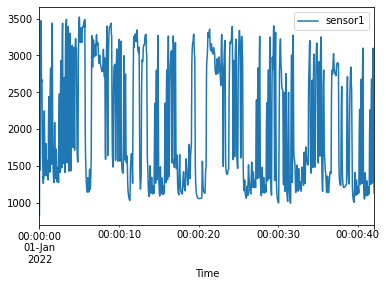

In [66]:
c.plot()

In [ ]:
fig = px.line(c,x=c.index,y="sensor1",labels={'Time': "second", 'sensor1': "something"},title="sensor1 Over Time")
fig.show()

In [67]:
c.reset_index(inplace=True)

In [69]:
c.rename(columns = {'Time':'ds', 'sensor1':'y'}, inplace = True)
c

,ds,y
0,2022-01-01 00:00:00.000,847.200413
1,2022-01-01 00:00:00.010,1817.782860
2,2022-01-01 00:00:00.020,1960.105094
3,2022-01-01 00:00:00.030,1941.061512
4,2022-01-01 00:00:00.040,1832.101878
...,...,...
4204,2022-01-01 00:00:42.040,1299.775410
4205,2022-01-01 00:00:42.050,1241.735960
4206,2022-01-01 00:00:42.060,1196.267310
4207,2022-01-01 00:00:42.070,1159.691520


In [71]:
fig = px.line(
    c,
    x='ds',
    y='y',
    labels={'ds': "Year", 'y': "Change in temperature (°C)"},
    title="Average Global Temperature Change Over Time"
)

fig.show()

In [6]:
"""time_series= time_series.set_index("Time")
time_series = time_series.resample("10L").mean()
time_series.reset_index(inplace=True)"""
time_series.rename(columns = {'Time':'ds', 'sensor1':'y'}, inplace = True)
time_series


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ds,y
0,2022-01-01 00:00:00.000000,-50.85
1,2022-01-01 00:00:00.000010,-44.72
2,2022-01-01 00:00:00.000030,-47.14
3,2022-01-01 00:00:00.000040,-33.58
4,2022-01-01 00:00:00.000050,-48.59
...,...,...
4085584,2022-01-01 00:00:42.087510,1127.81
4085585,2022-01-01 00:00:42.087520,1140.73
4085586,2022-01-01 00:00:42.087530,1123.99
4085587,2022-01-01 00:00:42.087540,1131.44


In [8]:
#time_series = c.iloc[:2000].copy()
time_train = time_series.iloc[:3200000, :].copy()
time_test = time_series.iloc[3200000:, :].copy()

In [ ]:
in_model = Prophet()
in_model.fit(time_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
in_forecast = in_model.predict(time_test).loc[:, ['ds', 'yhat']]

in_forecast["ds"] = in_forecast["ds"].astype(int)
time_series["ds"] = time_series["ds"].astype(int)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


In [18]:
in_forecast

,ds,yhat
0,1640995231500000000,1778.512148
1,1640995231510000000,1777.978016
2,1640995231520000000,1777.443883
3,1640995231530000000,1776.909751
4,1640995231540000000,1776.375619
...,...,...
1054,1640995242040000000,1215.536821
1055,1640995242050000000,1215.002689
1056,1640995242060000000,1214.468557
1057,1640995242070000000,1213.934425


In [19]:
in_result_df = time_series.merge(in_forecast, on='ds', how='left')

In [20]:
in_result_df["ds"] = pd.to_datetime(in_result_df["ds"])
in_result_df

,ds,y,yhat
0,2022-01-01 00:00:00.000,847.200413,NaN
1,2022-01-01 00:00:00.010,1817.782860,NaN
2,2022-01-01 00:00:00.020,1960.105094,NaN
3,2022-01-01 00:00:00.030,1941.061512,NaN
4,2022-01-01 00:00:00.040,1832.101878,NaN
...,...,...,...
4204,2022-01-01 00:00:42.040,1299.775410,1215.536821
4205,2022-01-01 00:00:42.050,1241.735960,1215.002689
4206,2022-01-01 00:00:42.060,1196.267310,1214.468557
4207,2022-01-01 00:00:42.070,1159.691520,1213.934425


In [21]:
fig = px.line(
    in_result_df,
    x='ds',
    y=['y', 'yhat'],
    color_discrete_sequence=['black', 'red'],
    labels={'ds': "Year"},
    title="Average Global Temperature Change Over Time"
)

fig.show()

In [80]:
p = time_series["ds"].astype(int)
p
m = pd.to_datetime(p)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

